### Loading our libraries 

In [15]:
#Importing Regular Expressions module 
import re

# Importing numpy 
import numpy as np

# ....... Pandas 
import pandas as pd

# ........ Tensorflow 
import tensorflow as tf
# ......... Matplotlib 
import matplotlib.pyplot as plt

# ..........Pandas 
import pandas as pd

# Importing train test split from Sklearn 
from sklearn.model_selection import train_test_split

import os

# load the libraries
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import cv2
from tqdm import tqdm

from PIL import Image

import sys
import csv


### Data Loading

In [16]:
DATADIR = "/home/francis/Documents/Compressed/covid19-pneumonia-normal-chest-xraypa-dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset"


CATEGORIES = ['covid', 'normal', 'pneumonia']






In [17]:
#Useful function
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)

    for root, dirs, files in os.walk(myDir, topdown=False):

        for name in files:

            if name.endswith(format):

                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList




### Visualize the data 

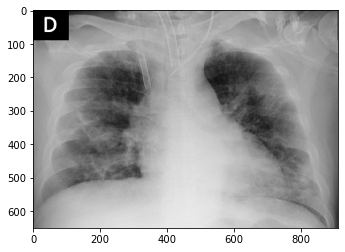

In [18]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 
        break
    break    

In [19]:
print(img_array)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 93  93  93]
  [ 70  70  70]
  [ 35  35  35]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 89  89  89]
  [ 67  67  67]
  [ 34  34  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 88  88  88]
  [ 67  67  67]
  [ 34  34  34]]

 ...

 [[104 104 104]
  [106 106 106]
  [111 111 111]
  ...
  [ 51  51  51]
  [ 49  49  49]
  [ 41  41  41]]

 [[105 105 105]
  [108 108 108]
  [114 114 114]
  ...
  [ 52  52  52]
  [ 49  49  49]
  [ 42  42  42]]

 [[106 106 106]
  [110 110 110]
  [117 117 117]
  ...
  [ 52  52  52]
  [ 49  49  49]
  [ 42  42  42]]]


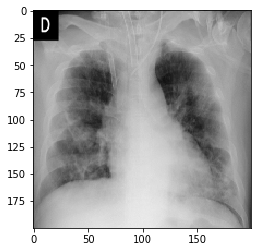

In [20]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

### Building our training data!

In [21]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

              

100%|██████████| 100/100 [00:01<00:00, 66.27it/s]

325


### Shuffling our data 

Next, we want to shuffle the data. Right now our data is just all pneumonia, then normal and covid. This will usually end up causing trouble as, initially, the classifier will learn to just predict  pneumonia, normal and covid

In [22]:
import random

random.shuffle(training_data)

### Viewing  the shaffled data.

In [23]:
for sample in training_data[:100]:
    print(sample[1])

1
0
2
1
2
2
0
0
1
1
1
0
1
2
0
0
2
2
1
1
0
2
1
1
2
2
0
0
2
2
1
1
2
0
2
1
1
0
0
2
1
2
2
1
0
2
1
0
2
2
1
0
1
0
1
1
2
1
0
1
1
2
2
1
2
1
1
2
1
1
1
1
2
0
0
2
0
0
2
0
1
2
1
1
2
1
1
2
0
1
2
2
0
1
0
1
1
1
2
0


### Making our model 

In [24]:
X=[]
y=[]

In [25]:

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[198]
   [140]
   [102]
   ...
   [150]
   [163]
   [174]]

  [[115]
   [ 62]
   [ 33]
   ...
   [ 16]
   [ 18]
   [ 35]]

  [[ 50]
   [ 18]
   [  6]
   ...
   [ 10]
   [  5]
   [  9]]

  ...

  [[ 22]
   [ 28]
   [ 27]
   ...
   [107]
   [102]
   [102]]

  [[ 19]
   [ 30]
   [ 33]
   ...
   [112]
   [108]
   [107]]

  [[ 14]
   [ 35]
   [ 37]
   ...
   [119]
   [115]
   [113]]]]


In [26]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Loading our current scripts 

### Making the predictions 

In [27]:
# Loading the libraries 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard


In [28]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3


2021-11-11 10:03:38.971712: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1284636672 exceeds 10% of free system memory.
2021-11-11 10:03:53.115329: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 642318336 exceeds 10% of free system memory.
2021-11-11 10:03:53.115620: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1284636672 exceeds 10% of free system memory.


1/8 [==>...........................] - ETA: 2:37 - loss: 0.7102 - accuracy: 0.3750

2021-11-11 10:04:00.700538: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1284636672 exceeds 10% of free system memory.
2021-11-11 10:04:16.751006: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 642318336 exceeds 10% of free system memory.


8/8 [==============================] - 174s 22s/step - loss: -0.8207 - accuracy: 0.4273 - val_loss: 47.1905 - val_accuracy: 0.3367
Epoch 2/3
8/8 [==============================] - 170s 21s/step - loss: -29.2093 - accuracy: 0.4053 - val_loss: 32.5645 - val_accuracy: 0.3367
Epoch 3/3
8/8 [==============================] - 271s 34s/step - loss: 76.9241 - accuracy: 0.4053 - val_loss: 320.0911 - val_accuracy: 0.3367


In [ ]:

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

### Final Predictions 